In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"Downloads\Bangalore_AQI_Dataset.csv")
df.head()

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Bangalore,01/01/2018,68,37.4,73.44,56.44,77.52,0.71,64.6
1,Bangalore,02/01/2018,76,41.8,82.08,63.08,86.64,0.80,72.2
2,Bangalore,03/01/2018,70,38.5,75.60,58.10,79.80,0.74,66.5
3,Bangalore,04/01/2018,78,42.9,84.24,64.74,88.92,0.82,74.1
4,Bangalore,05/01/2018,82,45.1,88.56,68.06,93.48,0.86,77.9


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    2556 non-null   object 
 1   Date    2556 non-null   object 
 2   AQI     2556 non-null   int64  
 3   PM2.5   2556 non-null   float64
 4   PM10    2556 non-null   float64
 5   NO2     2556 non-null   float64
 6   SO2     2556 non-null   float64
 7   CO      2556 non-null   float64
 8   O3      2556 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 179.8+ KB


City     0
Date     0
AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [4]:
df = df.drop_duplicates()

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
pm_cols = ['PM2.5', 'PM10']
for col in pm_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [7]:
gas_cols = ['NO2', 'SO2', 'CO', 'O3']
for col in gas_cols:
    if col in df.columns:
        df[col] = df[col].ffill() #Updated


In [8]:
df = df[(df['AQI'] >= 0) & (df['AQI'] <= 500)]

In [12]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['AQI', 'PM2.5', 'PM10']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

In [15]:
# Remove rows where all values are missing
df = df.dropna(how='all')
df = df.dropna(subset=['Date', 'AQI'])
# Remove columns where all values are missing
df = df.dropna(axis=1, how='all')
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)
df.isnull().sum()
df.shape


(989, 11)

In [16]:
# 🔟 Save Cleaned Dataset
df.to_csv("Downloads\Bangalore_AQI_Dataset_cleaned.csv", index=False)

In [17]:
##EDA
df.describe()

,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Year,Month
count,989,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,2021-07-02 19:46:39.191102208,72.121335,39.666734,77.891041,59.860708,82.218322,0.757614,68.515268,2021.030334,6.497472
min,2018-01-01 00:00:00,24.000000,13.200000,25.920000,19.920000,27.360000,0.250000,22.800000,2018.000000,1.000000
25%,2019-10-11 00:00:00,53.000000,29.150000,57.240000,43.990000,60.420000,0.560000,50.350000,2019.000000,4.000000
50%,2021-07-08 00:00:00,68.000000,37.400000,73.440000,56.440000,77.520000,0.710000,64.600000,2021.000000,6.000000
75%,2023-04-03 00:00:00,88.000000,48.400000,95.040000,73.040000,100.320000,0.920000,83.600000,2023.000000,10.000000
max,2024-12-12 00:00:00,138.000000,75.900000,149.040000,114.540000,157.320000,1.450000,131.100000,2024.000000,12.000000
std,NaN,23.365678,12.851123,25.234932,19.393513,26.636873,0.245261,22.197394,1.997237,3.460776


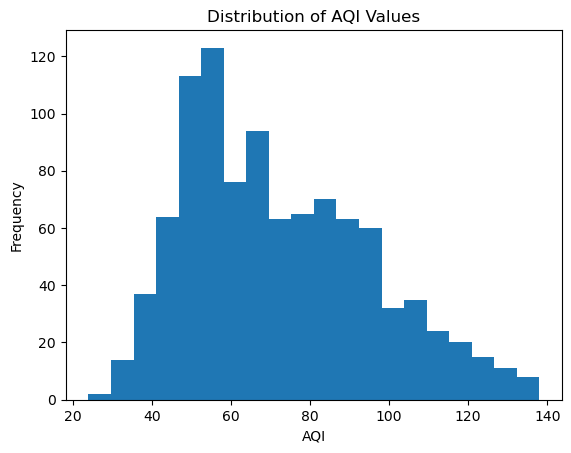

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['AQI'], bins=20)
plt.title("Distribution of AQI Values")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

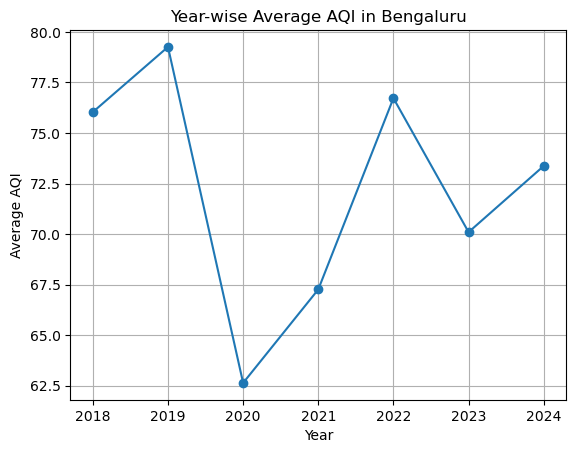

In [19]:
yearly_aqi = df.groupby('Year')['AQI'].mean()

plt.figure()
yearly_aqi.plot(marker='o')
plt.title("Year-wise Average AQI in Bengaluru")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

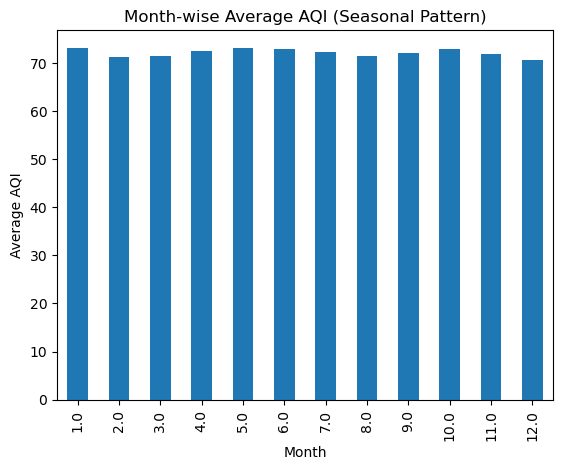

In [20]:
monthly_aqi = df.groupby('Month')['AQI'].mean()

plt.figure()
monthly_aqi.plot(kind='bar')
plt.title("Month-wise Average AQI (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.show()

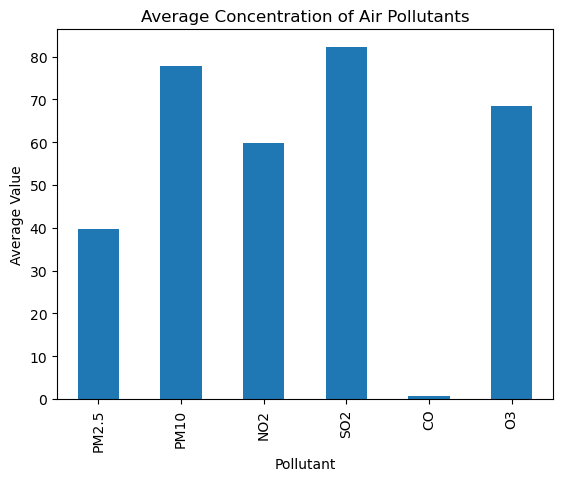

In [21]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3']

avg_pollutants = df[pollutants].mean()

plt.figure()
avg_pollutants.plot(kind='bar')
plt.title("Average Concentration of Air Pollutants")
plt.xlabel("Pollutant")
plt.ylabel("Average Value")
plt.show()

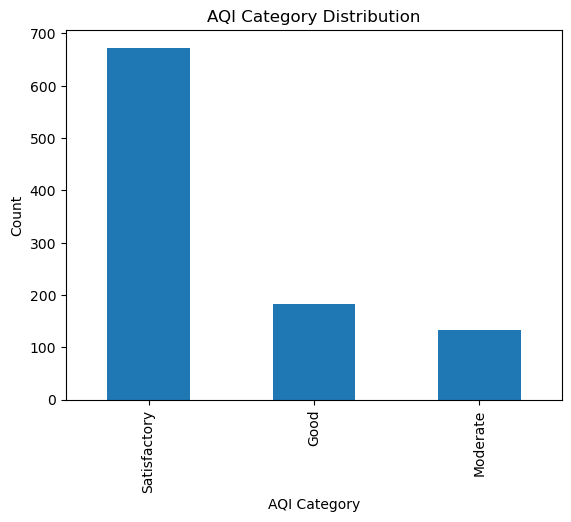

In [22]:
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(aqi_category)

df['AQI_Category'].value_counts().plot(kind='bar')
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

In [23]:
correlation = df[['AQI','PM2.5','PM10','NO2','SO2','CO','O3']].corr()
correlation

,AQI,PM2.5,PM10,NO2,SO2,CO,O3
AQI,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000
PM2.5,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000
PM10,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000
NO2,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000
SO2,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000
CO,0.99993,0.99993,0.99993,0.99993,0.99993,1.00000,0.99993
O3,1.00000,1.00000,1.00000,1.00000,1.00000,0.99993,1.00000


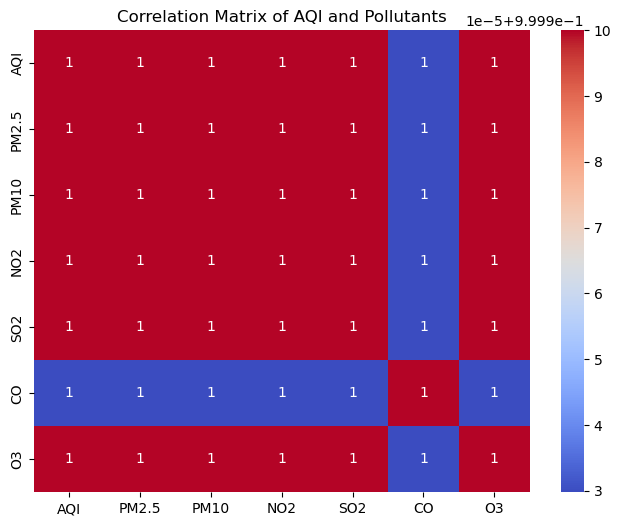

In [24]:
#heatmap
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of AQI and Pollutants")
plt.show()